<a href="https://colab.research.google.com/github/spinspin22/test1/blob/main/e_61_FeatureEngineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 특성공학

- 교차검증 소개
- 차원 축소
- SelectKBest
- PCA
- t-SNE

# 차원축소
## 차원 선택(축소) 방법
- 1) 사람이 경험으로 선택하는 방법
- 2) SelectKBest: 목적 변수와의 상관 관계가 큰 특성 선택
- 3) PCA(주성분 본석): 특성(입력 변수들) 간의 독립적인 성분을 기준으로 차원을 축소

## 시각화를 위한 차원 축소
- t-SNE: 시각화를 위한 2또는 3차원 차원 축소 

In [1]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf
# <colab 런타임 재시작 후 아래 코드 실행>
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
%config InlineBackend.figure_format="retina"
matplotlib.rcParams['figure.figsize'] = (5,5)
matplotlib.rcParams.update({'font.size': 13})

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import feature_selection
from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE

In [4]:
## 유방암 발생 데이터 다운로드

cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = cancer.target
print(X.shape)
X[:3].T

(569, 30)


,0,1,2
mean radius,17.990000,20.570000,19.690000
mean texture,10.380000,17.770000,21.250000
mean perimeter,122.800000,132.900000,130.000000
mean area,1001.000000,1326.000000,1203.000000
mean smoothness,0.118400,0.084740,0.109600
mean compactness,0.277600,0.078640,0.159900
mean concavity,0.300100,0.086900,0.197400
mean concave points,0.147100,0.070170,0.127900
mean symmetry,0.241900,0.181200,0.206900
mean fractal dimension,0.078710,0.056670,0.059990


In [5]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [6]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [7]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [8]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

## 교차 검증 k=5


In [9]:
## 교차 검증을 수행하는 함수 정의

# n 세트의 훈련용과 검증용 데이터를 랜덤하게 나눈다
# 디폴트 값은 shuffle=False 인 것을 주의 해야 한다

def cross_validation(model, X, y, n=5): 
    cv = KFold(n, shuffle=True)
    return cross_val_score(model, X, y, cv=cv).mean().round(4)

# 랜덤 포레스트 모델 사용

## 30개의 특성을 모두 사용하는 경우

In [10]:
## 30개 특성을 이용한 랜덤 포레스트 분류 모델

rfc = RandomForestClassifier()
cross_validation(rfc, X, y, 10)

0.9649

# SelectKBest

- 목적변수 y와의 상관 관계가 큰 특성을 k개 선택

In [16]:
## 목적변수 y와의 상관 관계가 큰 특성을 k개 선택

from sklearn.feature_selection import SelectKBest, chi2
sb = SelectKBest(chi2, k=6)
X_best = sb.fit_transform(X, y)
print(X_best.shape)

# 선택된 특성 컬럼명 보기
print('Selected Features: ')
print(list(X.columns[sb.get_support()]))
cross_validation(rfc, X_best, y)

(569, 6)
Selected Features: 
['mean perimeter', 'mean area', 'area error', 'worst radius', 'worst perimeter', 'worst area']


0.935

In [17]:
sb.get_support()

array([False, False,  True,  True, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True, False,  True,  True, False, False, False,
       False, False, False])

## 두개 특성의 산포도 그리기

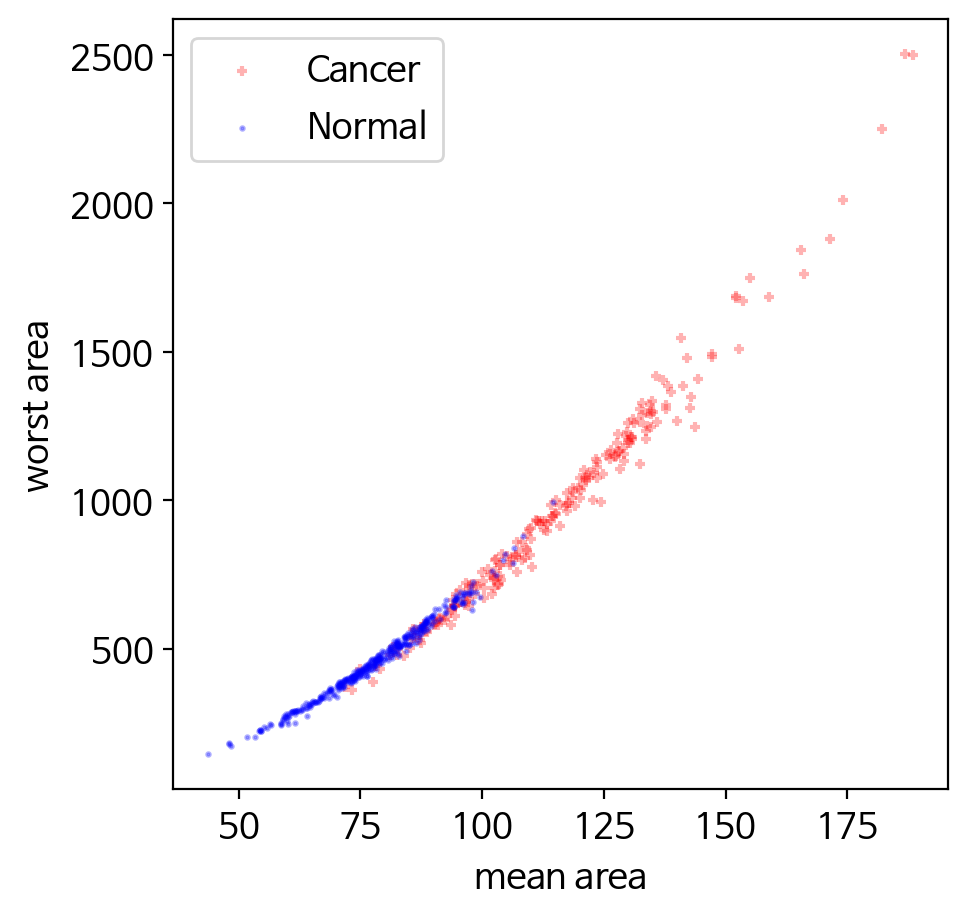

In [20]:
## 두 개 특성의 산포도 그리기

plt.scatter(X_best[:,0][y==0],X_best[:,1][y==0],
            marker='+', s=13, color='r', label='Cancer', alpha=0.3)
plt.scatter(X_best[:,0][y==1],X_best[:,1][y==1],
            marker='.', s=7, color='b', label='Normal', alpha=0.3)
plt.xlabel('mean area')
plt.ylabel('worst area')
plt.legend()

# PCA를 사용한 차원 축소

## PCA 개념
<img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-10-04%20%E1%84%8B%E1%85%A9%E1%84%8C%E1%85%A5%E1%86%AB%209.24.09.png?raw=1" align='left'  width=300>

0.9244


/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


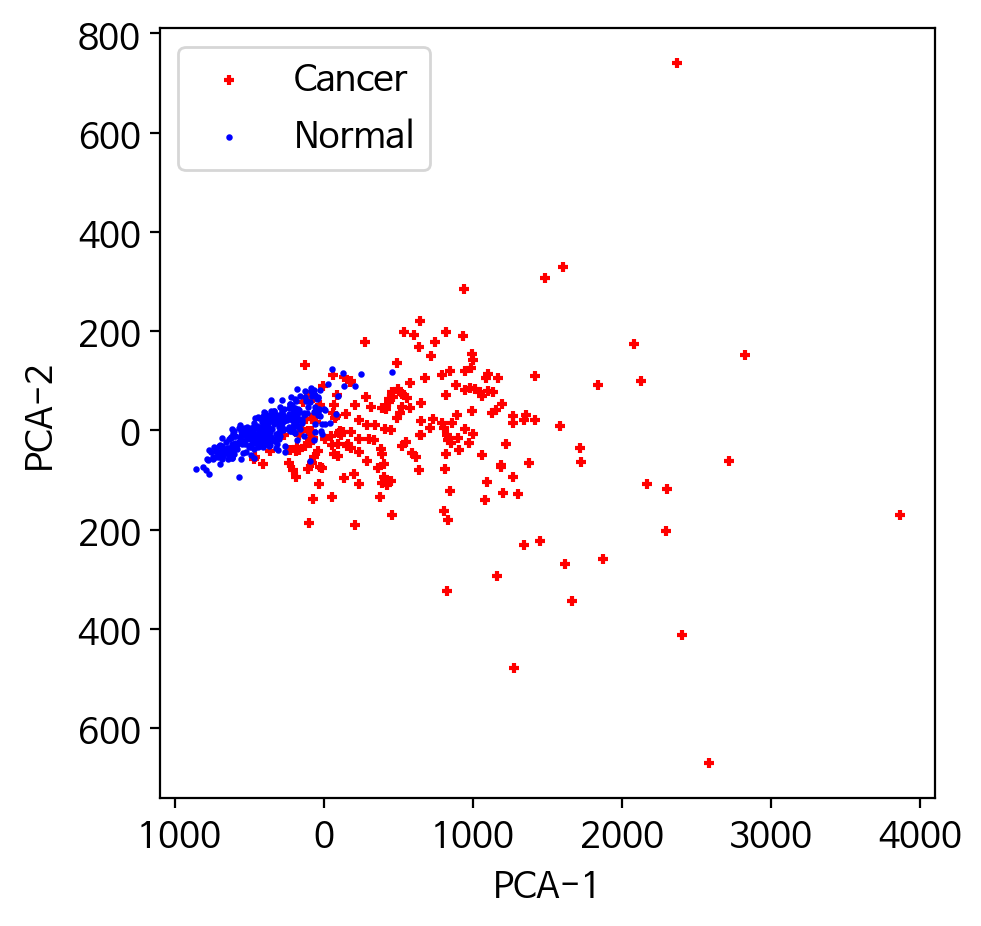

In [21]:
## 2개의 주성분(PCA) 사용 결과

pca = PCA(2)
X_pca = pca.fit_transform(X)
print(cross_validation(rfc, X_pca, y))

# 두 개 주성분을 축으로 산포도 그리기
plt.scatter(X_pca[:,0][y==0],X_pca[:,1][y==0],
            marker='+', s=13, color='r', label='Cancer')
plt.scatter(X_pca[:,0][y==1],X_pca[:,1][y==1],
            marker='.', s=7, color='b', label='Normal')
plt.xlabel('PCA-1')
plt.ylabel('PCA-2')
plt.legend()

## pca 생성에 사용한 가중치

In [22]:
## pca 생성시에 가중합을 사용한다. 가중치를 보는 내부 변수

print(pca.components_.round(3))

[[ 0.005  0.002  0.035  0.517  0.     0.     0.     0.     0.    -0.
   0.    -0.     0.002  0.056 -0.     0.     0.     0.    -0.    -0.
   0.007  0.003  0.049  0.852  0.     0.     0.     0.     0.     0.   ]
 [ 0.009 -0.003  0.063  0.852 -0.    -0.     0.     0.    -0.    -0.
  -0.     0.     0.001  0.008  0.     0.     0.     0.     0.     0.
  -0.001 -0.013 -0.    -0.52  -0.    -0.    -0.    -0.    -0.    -0.   ]]


In [23]:
X.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

- PCA는 샘플을 저차원 특성공간에서 (보통 2차원) 분포를 파악할 때 자주 사용된다 
<img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-05-30%20%E1%84%8B%E1%85%A9%E1%84%8C%E1%85%A5%E1%86%AB%209.31.41.png?raw=1" align='left'  width=400>

# t-SNE 시각화

- T-distributed Stochastic Neighbor Embedding
- 실행할 때마다 다른 패턴을 보여준다
- perplexity를 바꾸면 그림이 다르게 나타난다
- 데이터를 설명하기 가장 좋은 그림을 택하면 된다
- PCA의 2차원 패턴은 하나로 고정된다

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


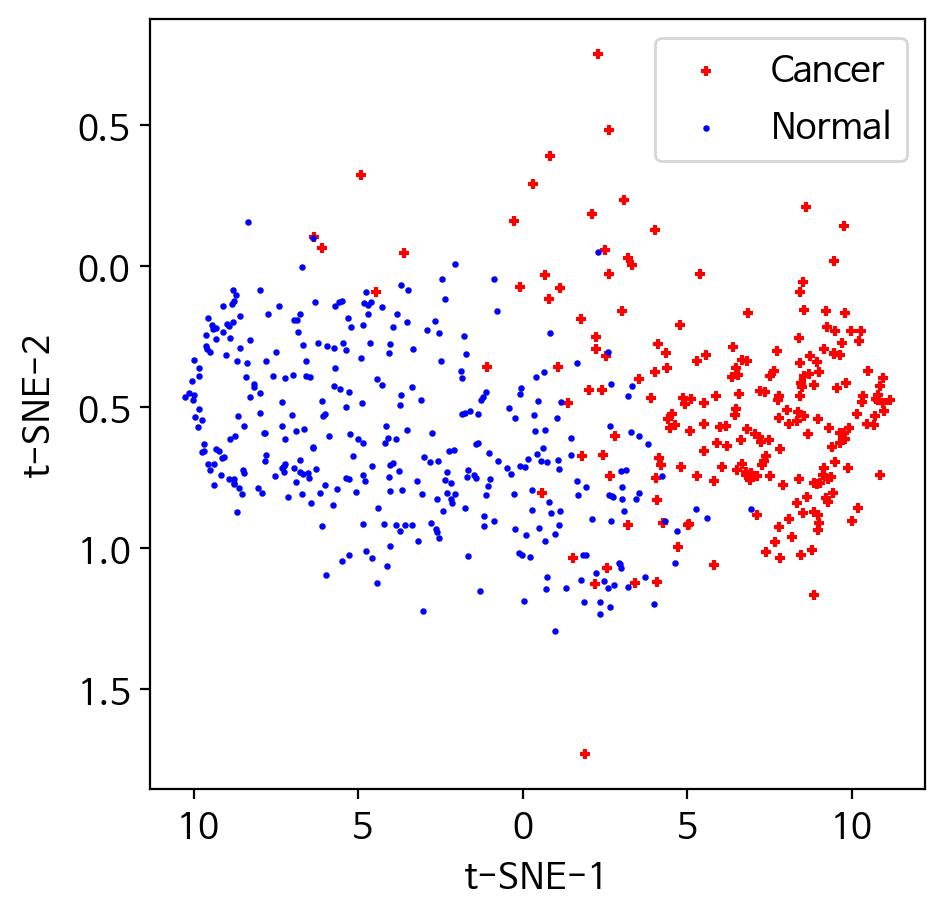

In [24]:
## 2차원 t-SNE 수행과 시각화

tsne = TSNE(2, perplexity=150)
tsne_2 = tsne.fit_transform(X)


plt.scatter(tsne_2[:,0][y==0],tsne_2[:,1][y==0],
            marker='+', s=13, color='r', label='Cancer')
plt.scatter(tsne_2[:,0][y==1],tsne_2[:,1][y==1],
            marker='.', s=7, color='b', label='Normal')

plt.xlabel('t-SNE-1')
plt.ylabel('t-SNE-2')
plt.legend()

# (실습) PCA 차원수를 늘리면서 성능의 개선을 확인하시오
- PCA 차원수를 2~10 범위에서 모델의 성능을 확인한다
- 교차 검증을 사용하시오

In [ ]:
result = []

for k in range(2,11):
    pca = PCA(k)
    X_pca = pca.fit_transform(X)
    result.append((k, cross_validation(rfc, X_pca, y)))

<AxesSubplot:xlabel='k'>

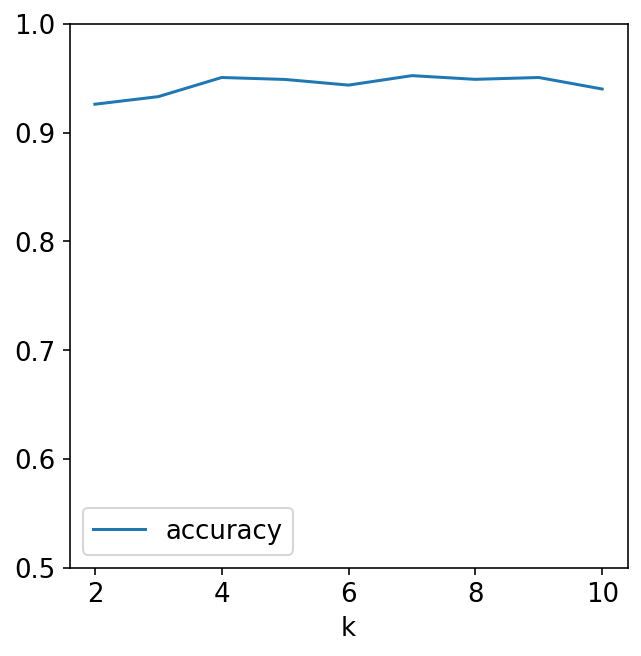

In [ ]:
df = pd.DataFrame(result, columns=['k','accuracy'])
df = df.set_index('k')
df.plot(ylim=(0.5,1))

In [ ]:
df

,accuracy
k,
2,0.9262
3,0.9332
4,0.9508
5,0.9490
6,0.9438
7,0.9525
8,0.9491
9,0.9508
10,0.9402
